# Introduction to Image Preprocessing and Classification
==================================================

This code demonstrates basic image preprocessing steps and classification
without using complex functions. Each step is clearly separated and explained.


Steps include:
1. Basic image loading and visualization
2. Image resizing
3. Denoising
4. Normalization
5. Simple CNN classification

The code works with Fashion MNIST - a dataset of 70,000 clothing images in 10 categories from Zalando. Each image is a 28x28 grayscale picture of items like shirts, shoes, or dresses.
The code does 4 main things:

1. Loads and shows the clothing images
2. Processes the images (removes noise, normalizes pixel values)
3. Creates variations of images through data augmentation (rotations, shifts)
4. Builds and trains a CNN model to classify the clothing items

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [2]:
# Load Fashion MNIST dataset
print("Loading Fashion MNIST dataset...")
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

Loading Fashion MNIST dataset...
29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [3]:
# Define class names for Fashion MNIST
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


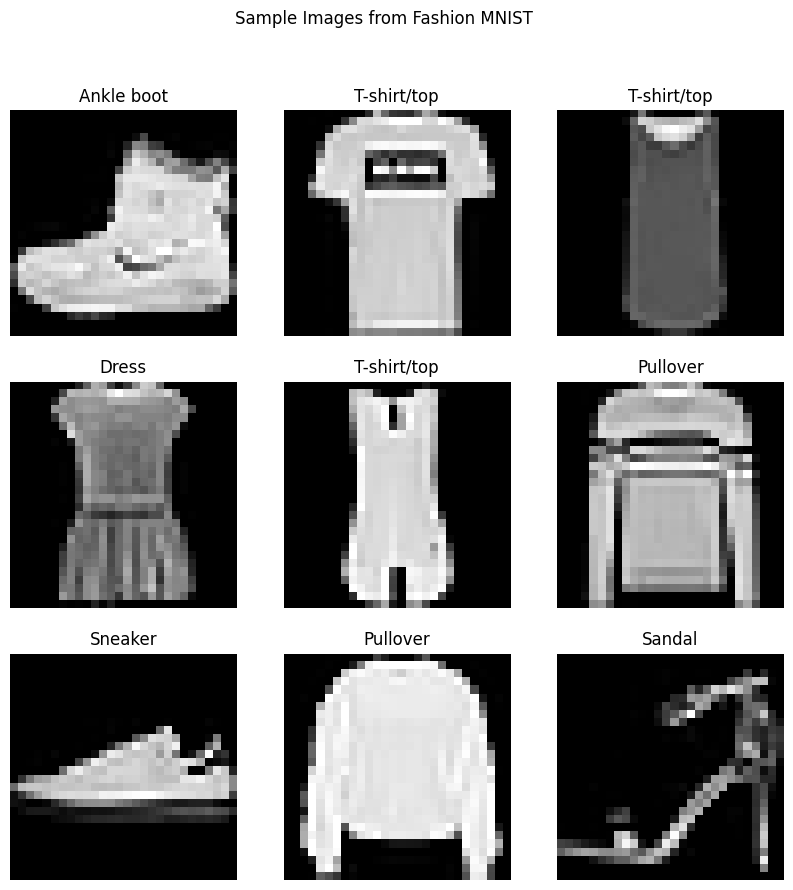

In [4]:
# Display sample images from dataset
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(class_names[y_train[i]])
    plt.axis('off')
plt.suptitle('Sample Images from Fashion MNIST')
plt.show()


Step 1: Basic Image Processing


Text(0.5, 1.0, 'Noisy Image')

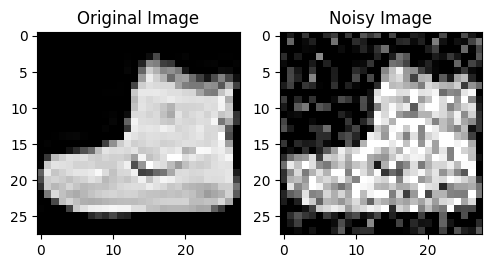

In [5]:
# Step 1: Basic Image Processing
print("\nStep 1: Basic Image Processing")
# Select a sample image
sample_image = X_train[0]

plt.figure(figsize=(12, 4))
# Original image
plt.subplot(141)
plt.imshow(sample_image, cmap='gray')
plt.title('Original Image')

# Add random noise
noisy_image = sample_image + np.random.normal(0, 50, sample_image.shape)
noisy_image = np.clip(noisy_image, 0, 255)
plt.subplot(142)
plt.imshow(noisy_image, cmap='gray')
plt.title('Noisy Image')

Text(0.5, 1.0, 'Denoised Image')

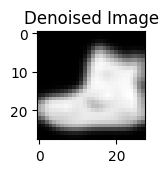

In [6]:
!pip install opencv-python
import cv2 # Import the OpenCV library

# Gaussian blur for denoising
blurred_image = cv2.GaussianBlur(sample_image, (5, 5), 0)
plt.subplot(143)
plt.imshow(blurred_image, cmap='gray')
plt.title('Denoised Image')


Step 2: Normalization


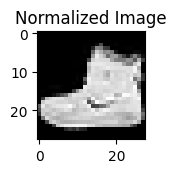

In [7]:
# Step 2: Normalization
print("\nStep 2: Normalization")
normalized_image = sample_image / 255.0
plt.subplot(144)
plt.imshow(normalized_image, cmap='gray')
plt.title('Normalized Image')
plt.show()

In [8]:
# Preprocess all images
print("\nPreprocessing all images...")
# Add channel dimension and normalize
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255.0
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255.0


Preprocessing all images...


In [9]:
# Step 3: Data Augmentation
print("\nStep 3: Setting up data augmentation...")
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1
)



Step 3: Setting up data augmentation...


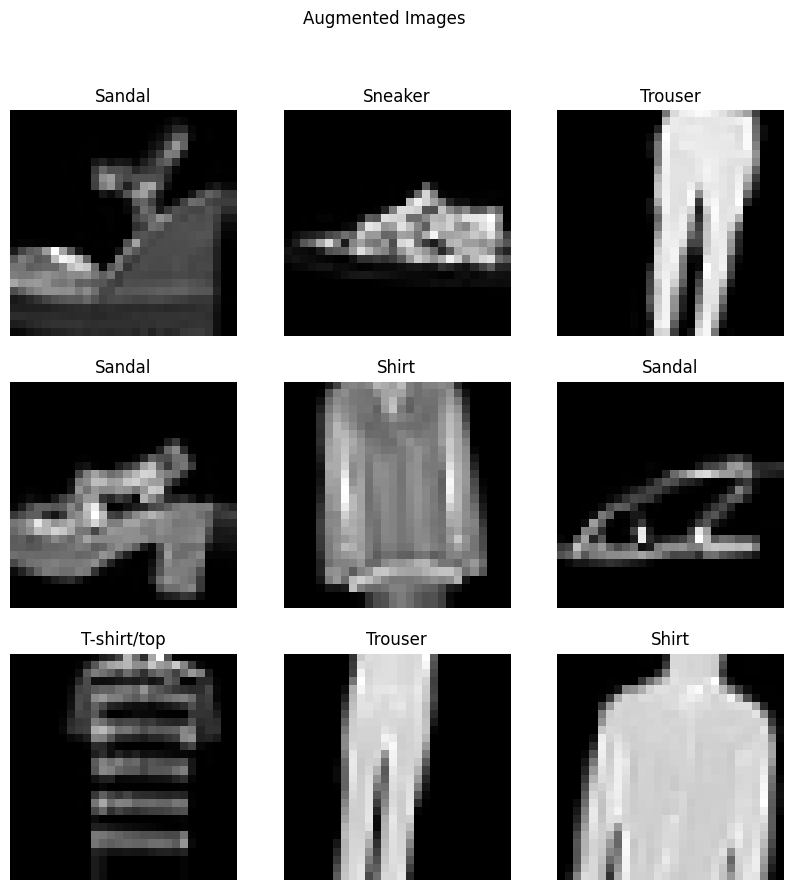

In [10]:
# Display augmented images
plt.figure(figsize=(10, 10))
# Pass the full datasets to flow() for augmentation
for i, (image, label) in enumerate(datagen.flow(X_train, y_train, batch_size=1)):
    plt.subplot(3, 3, i + 1)
    plt.imshow(image[0, :, :, 0], cmap='gray')
    plt.title(class_names[label[0]])
    plt.axis('off')
    if i == 8:
        break
plt.suptitle('Augmented Images')
plt.show()


In [11]:
# Step 4: Create and train model
print("\nStep 4: Creating and training model...")
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

print("\nModel Summary:")
model.summary()


Step 4: Creating and training model...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Model Summary:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │         102,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 121,930 (476.29 KB)

 Trainable params: 121,930 (476.29 KB)

 Non-trainable params: 0 (0.00 B)


Training model...
Epoch 1/2
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 29s 15ms/step - accuracy: 0.8652 - loss: 0.3634 - val_accuracy: 0.8801 - val_loss: 0.3196
Epoch 2/2
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 27s 15ms/step - accuracy: 0.8684 - loss: 0.3493 - val_accuracy: 0.8785 - val_loss: 0.3244


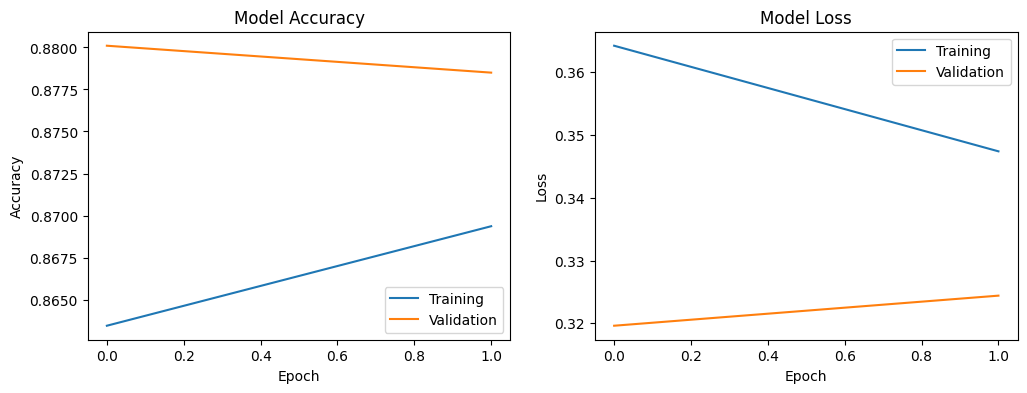

In [14]:
# Train the model
print("\nTraining model...")
history = model.fit(
    datagen.flow(X_train, y_train, batch_size=32),
    epochs=2,
    validation_data=(X_test, y_test)
)

# Plot training results
plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.plot(history.history['accuracy'], label='Training')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(122)
plt.plot(history.history['loss'], label='Training')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
# Make predictions
print("\nMaking predictions...")
predictions = model.predict(X_test[:9])

# Display results
plt.figure(figsize=(15, 15))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(X_test[i, :, :, 0], cmap='gray')
    predicted_label = np.argmax(predictions[i])
    true_label = y_test[i]
    color = 'green' if predicted_label == true_label else 'red'
    plt.title(f'Pred: {class_names[predicted_label]}\nTrue: {class_names[true_label]}',
              color=color)
    plt.axis('off')
plt.show()